In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns; 
sns.set(color_codes=True)

from sklearn.preprocessing import QuantileTransformer

In [14]:
store_visits = pd.read_csv('datasets/store_visits.csv')

store_visits.sample(10)

,Visits,Revenue,StoreID
116,869.417595,4402.087975,1
53,1048.442173,5292.210863,1
300,488.696193,578.634849,0
100,875.430659,4437.153297,1
389,450.654608,829.225233,0
83,1099.135918,5505.679591,1
303,499.864498,714.244680,0
248,531.206300,733.304341,0
13,1061.823120,5357.115600,1
353,505.425811,759.554007,0


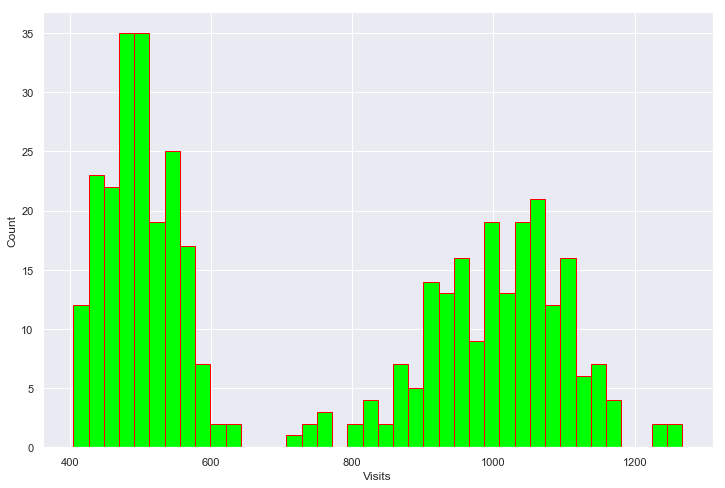

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Visits'], 
         facecolor='lime', 
         edgecolor='red', 
         bins=40)

plt.xlabel('Visits')
plt.ylabel('Count')

plt.show()

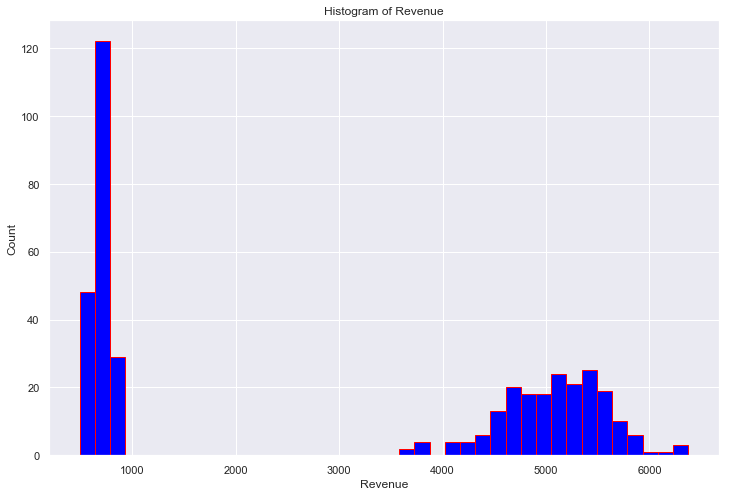

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Revenue'], 
         facecolor='blue', 
         edgecolor='red', 
         bins=40)

plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

In [17]:
transformer = QuantileTransformer(output_distribution='normal', n_quantiles=200)

store_transform = transformer.fit_transform(store_visits[['Visits','Revenue']])

In [18]:
store_transform_df = pd.DataFrame(data = store_transform,
                                  columns=['Visits_transform', 'Revenue_transform'])
store_transform_df.head()

,Visits_transform,Revenue_transform
0,0.689662,0.733025
1,0.990498,0.989974
2,0.315277,0.334061
3,0.370619,0.426712
4,1.221233,1.245011


In [19]:
final_df = pd.concat([store_visits, store_transform_df], axis=1)

final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.689662,0.733025
1,1058.607260,5349.036298,1,0.990498,0.989974
2,935.069490,4756.347453,1,0.315277,0.334061
3,952.360965,4849.804826,1,0.370619,0.426712
4,1078.384010,5467.920052,1,1.221233,1.245011


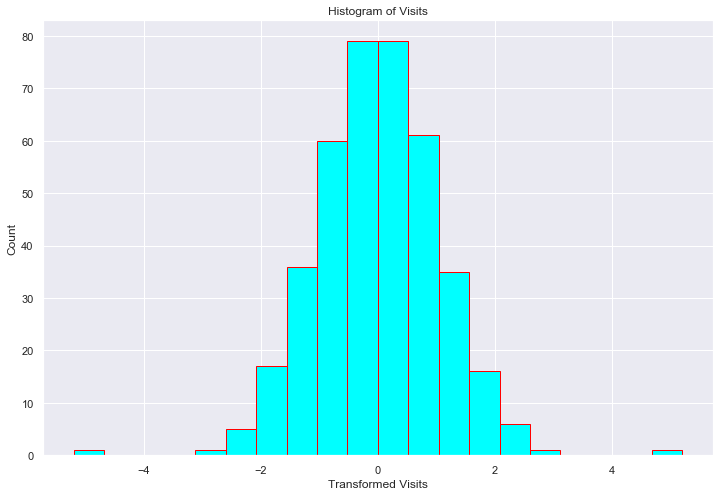

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Visits_transform'], 
         facecolor='cyan', 
         edgecolor='red', 
         bins=20)

plt.xlabel('Transformed Visits')
plt.ylabel('Count')
plt.title('Histogram of Visits')

plt.show()

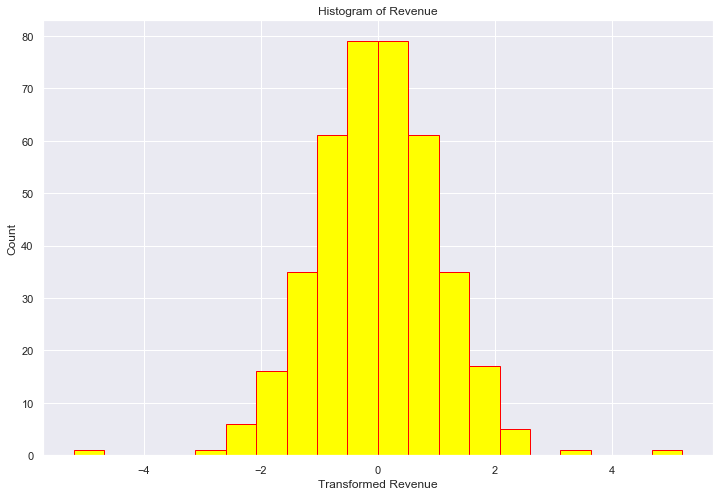

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Revenue_transform'], 
         facecolor='yellow', 
         edgecolor='red', 
         bins=20)

plt.xlabel('Transformed Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

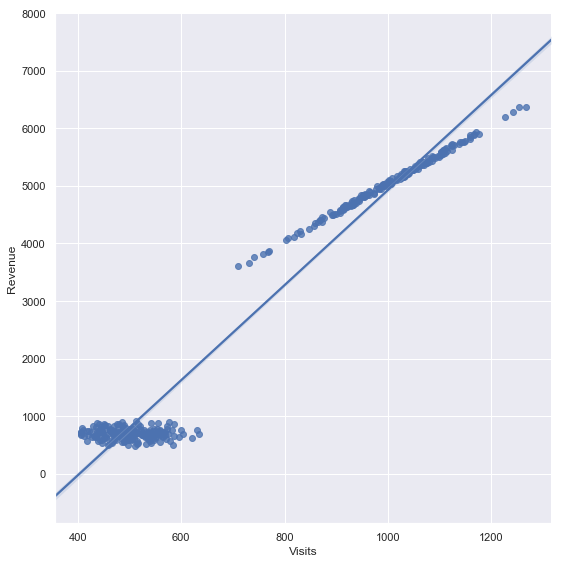

In [23]:
sns.lmplot(x="Visits", 
           y="Revenue", 
           data=final_df, 
           height=8)

plt.show()

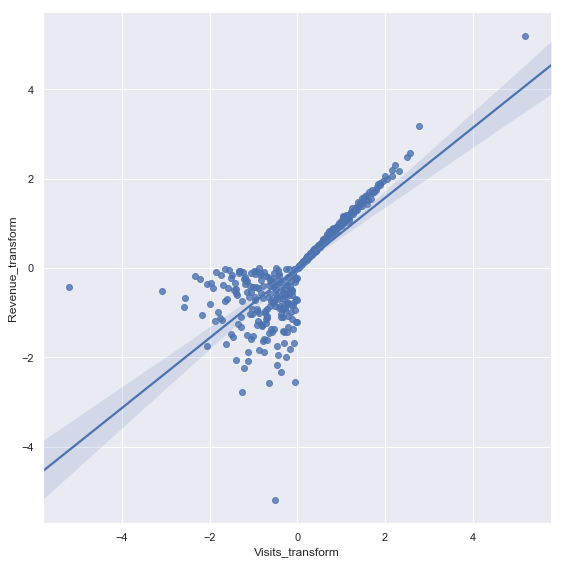

In [24]:
g = sns.lmplot(x="Visits_transform", 
               y="Revenue_transform", 
               data=final_df, 
               height=8)

plt.show()